# 2019.02 Ford Go Bike - tripdata
## by Szymon Debski

## Preliminary Wrangling

> This data set is taken from https://www.fordgobike.com/system-data and represents trips taken by members of the service for month of February of 2019.

> Data consists of info about trips taken by service's members, their types, their age, their gender, stations of starting and ending trips, duration of trips etc.

In [147]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

import warnings
warnings.simplefilter("ignore")

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [148]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [149]:
df.shape

(183412, 16)

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [151]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


### Data Cleaning

In [152]:
df_clean = df.copy()

##### Remove columns that are not of interest to me

In [153]:
list(df_clean.columns)

['duration_sec',
 'start_time',
 'end_time',
 'start_station_id',
 'start_station_name',
 'start_station_latitude',
 'start_station_longitude',
 'end_station_id',
 'end_station_name',
 'end_station_latitude',
 'end_station_longitude',
 'bike_id',
 'user_type',
 'member_birth_year',
 'member_gender',
 'bike_share_for_all_trip']

In [154]:
df_clean.drop(['start_station_id',
 'start_station_name',
 'start_station_latitude',
 'start_station_longitude',
 'end_station_id',
 'end_station_name',
 'end_station_latitude',
 'end_station_longitude'], axis=1, inplace=True)

In [155]:
df_clean.head()

,duration_sec,start_time,end_time,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,4898,Subscriber,1974.0,Male,Yes


In [156]:
df_clean.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

##### Drop records with null values

In [157]:
df_clean = df_clean[df_clean['member_birth_year'].isnull() == False]

In [158]:
df_clean.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [159]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175147 entries, 0 to 183411
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             175147 non-null  int64  
 1   start_time               175147 non-null  object 
 2   end_time                 175147 non-null  object 
 3   bike_id                  175147 non-null  int64  
 4   user_type                175147 non-null  object 
 5   member_birth_year        175147 non-null  float64
 6   member_gender            175147 non-null  object 
 7   bike_share_for_all_trip  175147 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 12.0+ MB


In [160]:
df_clean.user_type.value_counts()

Subscriber    158516
Customer       16631
Name: user_type, dtype: int64

In [161]:
df_clean.member_gender.value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

##### Drop 'Other from gender column'

In [162]:
df_clean = df_clean[df_clean['member_gender'] != 'Other']

In [163]:
df_clean.member_gender.value_counts()

Male      130651
Female     40844
Name: member_gender, dtype: int64

In [164]:
df_clean.duplicated().sum()

0

In [165]:
df_clean.start_time = pd.to_datetime(df_clean['start_time'])
df_clean.end_time = pd.to_datetime(df_clean['end_time'])

In [166]:
df_clean['weekday'] = df_clean['start_time'].dt.day_name()
df_clean['hour']= df_clean['start_time'].dt.hour

In [167]:
df_clean.sample(1)

,duration_sec,start_time,end_time,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,weekday,hour
28155,359,2019-02-25 08:57:11.110,2019-02-25 09:03:10.381,5633,Subscriber,1987.0,Female,No,Monday,8


In [168]:
df_clean.weekday.value_counts()

Thursday     33005
Tuesday      30051
Wednesday    27853
Friday       27102
Monday       25151
Sunday       14203
Saturday     14130
Name: weekday, dtype: int64

###### Create a column duration in minutes

In [171]:
df_clean['duration_minutes'] = round(df_clean['duration_sec'] / 60, 0)

In [172]:
df_clean.sample(5)

,duration_sec,start_time,end_time,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,weekday,hour,duration_minutes
182441,714,2019-02-01 08:11:47.664,2019-02-01 08:23:41.687,1469,Subscriber,1992.0,Female,No,Friday,8,12.0
34008,306,2019-02-24 09:48:33.715,2019-02-24 09:53:40.600,5940,Subscriber,1987.0,Male,No,Sunday,9,5.0
142935,285,2019-02-07 16:32:46.908,2019-02-07 16:37:32.328,2848,Subscriber,1982.0,Male,No,Thursday,16,5.0
17846,456,2019-02-26 20:23:55.220,2019-02-26 20:31:31.586,1576,Customer,1991.0,Male,No,Tuesday,20,8.0
121410,574,2019-02-11 15:19:28.770,2019-02-11 15:29:03.413,4895,Customer,1997.0,Male,No,Monday,15,10.0


##### Calculate age for users of service

In [173]:
df_clean['age'] = 2019 - df_clean['member_birth_year']

In [174]:
df_clean.sample(5)

,duration_sec,start_time,end_time,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,weekday,hour,duration_minutes,age
78865,175,2019-02-18 18:34:18.671,2019-02-18 18:37:13.813,4909,Subscriber,1983.0,Male,No,Monday,18,3.0,36.0
33702,625,2019-02-24 10:50:43.535,2019-02-24 11:01:09.124,4065,Subscriber,1995.0,Male,Yes,Sunday,10,10.0,24.0
25297,883,2019-02-25 17:04:49.919,2019-02-25 17:19:33.485,6353,Subscriber,1990.0,Male,No,Monday,17,15.0,29.0
108268,534,2019-02-13 08:57:10.372,2019-02-13 09:06:04.484,3676,Customer,1989.0,Male,No,Wednesday,8,9.0,30.0
157698,579,2019-02-05 20:54:28.249,2019-02-05 21:04:07.592,2859,Subscriber,1994.0,Male,Yes,Tuesday,20,10.0,25.0


In [175]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171495 entries, 0 to 183411
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             171495 non-null  int64         
 1   start_time               171495 non-null  datetime64[ns]
 2   end_time                 171495 non-null  datetime64[ns]
 3   bike_id                  171495 non-null  int64         
 4   user_type                171495 non-null  object        
 5   member_birth_year        171495 non-null  float64       
 6   member_gender            171495 non-null  object        
 7   bike_share_for_all_trip  171495 non-null  object        
 8   weekday                  171495 non-null  object        
 9   hour                     171495 non-null  int64         
 10  duration_minutes         171495 non-null  float64       
 11  age                      171495 non-null  float64       
dtypes: datetime64[ns

In [176]:
df_clean['duration_minutes'] = df_clean['duration_minutes'].astype(int)
df_clean['age'] = df_clean['age'].astype(int)

In [177]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171495 entries, 0 to 183411
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             171495 non-null  int64         
 1   start_time               171495 non-null  datetime64[ns]
 2   end_time                 171495 non-null  datetime64[ns]
 3   bike_id                  171495 non-null  int64         
 4   user_type                171495 non-null  object        
 5   member_birth_year        171495 non-null  float64       
 6   member_gender            171495 non-null  object        
 7   bike_share_for_all_trip  171495 non-null  object        
 8   weekday                  171495 non-null  object        
 9   hour                     171495 non-null  int64         
 10  duration_minutes         171495 non-null  int32         
 11  age                      171495 non-null  int32         
dtypes: datetime64[ns

### What is the structure of your dataset?

The data set consists of approx. 180k bike rides in San Francisco.

The data contains:

>- Trip duration
>- Start / Endstation
>- Bike ID 
>- User info (user type, date of birth, gender)


### What is the main feature of interest in your dataset?

> I'm interested in analyzing trip duration depending on user type

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

- duration_sec
- user_type
- member_birth_year
- member_gender

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [178]:
df_clean.describe()

,duration_sec,bike_id,member_birth_year,hour,duration_minutes,age
count,171495.000000,171495.000000,171495.000000,171495.000000,171495.000000,171495.000000
mean,697.987218,4480.962868,1984.842328,13.451698,11.632992,34.157672
std,1576.717221,1658.635854,10.113921,4.732831,26.280664,10.113921
min,61.000000,11.000000,1878.000000,0.000000,1.000000,18.000000
25%,323.000000,3799.000000,1980.000000,9.000000,5.000000,27.000000
50%,510.000000,4959.000000,1987.000000,14.000000,8.000000,32.000000
75%,787.000000,5505.000000,1992.000000,17.000000,13.000000,39.000000
max,84548.000000,6645.000000,2001.000000,23.000000,1409.000000,141.000000


##### It seems that the 'duration_minutes' data is highly skewed to the right, most rides are short however there are some that are long we will have to take a closer look

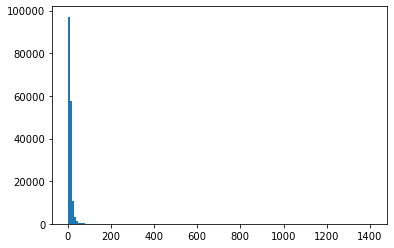

In [179]:
bins = np.arange(0, df_clean['duration_minutes'].max()+10, 10)
plt.hist(df_clean['duration_minutes'], bins = bins);

In [180]:
np.log10(df_clean['duration_minutes'].describe())

count    5.234251
mean     1.065691
std      1.419636
min      0.000000
25%      0.698970
50%      0.903090
75%      1.113943
max      3.148911
Name: duration_minutes, dtype: float64

##### Let's transform the scale so that we have a better look at the data. We will use the log10 transformation for the bins and use a log scale for the x-axis.

Text(0.5, 0, 'Duration')

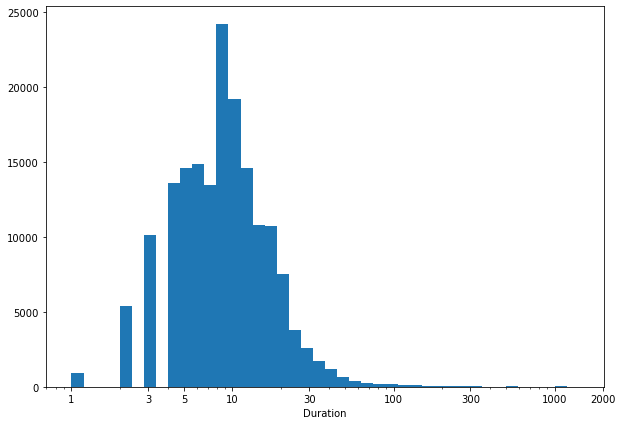

In [181]:
bin_size = 0.075
bins = 10 ** np.arange(0, np.log10(df_clean['duration_minutes'].max()) + bin_size, bin_size)

plt.figure(figsize=[10, 7]);
plt.hist(data = df_clean, x = 'duration_minutes', bins = bins);
plt.xscale('log');
ticks = [1, 3, 5, 10, 30, 100, 300, 1000, 2000]
labels = ['{}'.format(val) for val in ticks]

plt.xticks(ticks, labels)
plt.xlabel('Duration')

##### This looks much better.  We can drop the outliers - trips longer than 100 minutes. 

In [182]:
df_clean = df_clean[df_clean['duration_minutes'] <= 100]
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170834 entries, 4 to 183411
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             170834 non-null  int64         
 1   start_time               170834 non-null  datetime64[ns]
 2   end_time                 170834 non-null  datetime64[ns]
 3   bike_id                  170834 non-null  int64         
 4   user_type                170834 non-null  object        
 5   member_birth_year        170834 non-null  float64       
 6   member_gender            170834 non-null  object        
 7   bike_share_for_all_trip  170834 non-null  object        
 8   weekday                  170834 non-null  object        
 9   hour                     170834 non-null  int64         
 10  duration_minutes         170834 non-null  int32         
 11  age                      170834 non-null  int32         
dtypes: datetime64[ns

Text(0.5, 0, 'Duration')

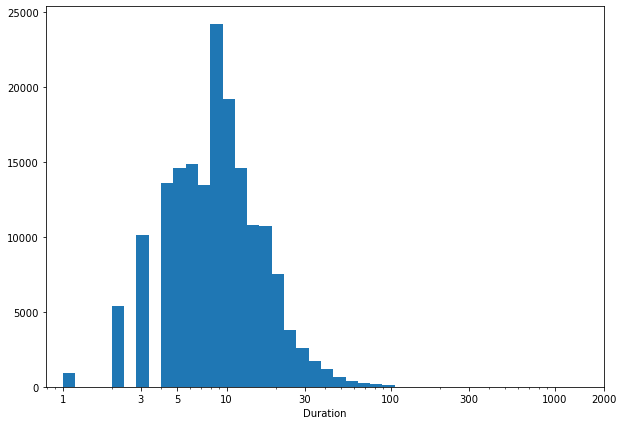

In [183]:
bin_size = 0.075
bins = 10 ** np.arange(0, np.log10(df_clean['duration_minutes'].max()) + bin_size, bin_size)

plt.figure(figsize=[10, 7]);
plt.hist(data = df_clean, x = 'duration_minutes', bins = bins);
plt.xscale('log');
ticks = [1, 3, 5, 10, 30, 100, 300, 1000, 2000]
labels = ['{}'.format(val) for val in ticks]

plt.xticks(ticks, labels)
plt.xlabel('Duration')

In [184]:
df_clean['age'].describe()

count    170834.000000
mean         34.153084
std          10.113001
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: age, dtype: float64

##### Data skewed to the right plus oldest customer is 141 years old this can't be correct

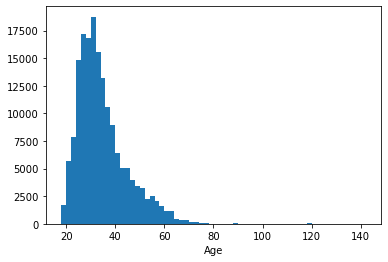

In [185]:
bins = np.arange(18, df_clean['age'].max()+2, 2)
plt.hist(df_clean['age'], bins = bins);
plt.xlabel('Age');

##### The distribution does not look good, let's drop the outliers

In [186]:
df_clean = df_clean[df_clean['age'] <= 65]
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169513 entries, 4 to 183411
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             169513 non-null  int64         
 1   start_time               169513 non-null  datetime64[ns]
 2   end_time                 169513 non-null  datetime64[ns]
 3   bike_id                  169513 non-null  int64         
 4   user_type                169513 non-null  object        
 5   member_birth_year        169513 non-null  float64       
 6   member_gender            169513 non-null  object        
 7   bike_share_for_all_trip  169513 non-null  object        
 8   weekday                  169513 non-null  object        
 9   hour                     169513 non-null  int64         
 10  duration_minutes         169513 non-null  int32         
 11  age                      169513 non-null  int32         
dtypes: datetime64[ns

##### This looks much better still right-skewed but in reason

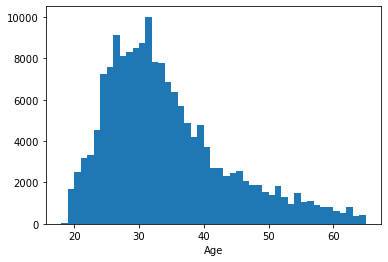

In [187]:
bins = np.arange(18, df_clean['age'].max()+1, 1)
plt.hist(df_clean['age'], bins = bins);
plt.xlabel('Age');

In [188]:
df_clean.head()

,duration_sec,start_time,end_time,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,weekday,hour,duration_minutes,age
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,4898,Subscriber,1974.0,Male,Yes,Thursday,23,26,45
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,5200,Subscriber,1959.0,Male,No,Thursday,23,30,60
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,3803,Subscriber,1983.0,Female,No,Thursday,23,19,36
7,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,6329,Subscriber,1989.0,Male,No,Thursday,23,27,30
9,1049,2019-02-28 23:49:47.699,2019-03-01 00:07:17.025,6488,Subscriber,1992.0,Male,No,Thursday,23,17,27


##### When looking at our customer base we can see that most people which use the bikes are subscribers

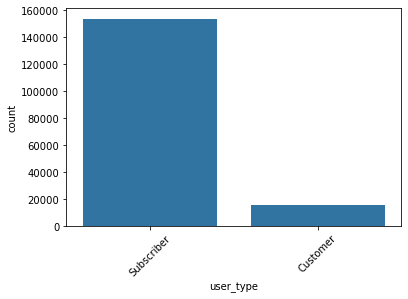

In [189]:
sb.countplot(data = df_clean, x = 'user_type', color = sb.color_palette()[0])
plt.xticks(rotation = 45);

##### Most people using the service are Male

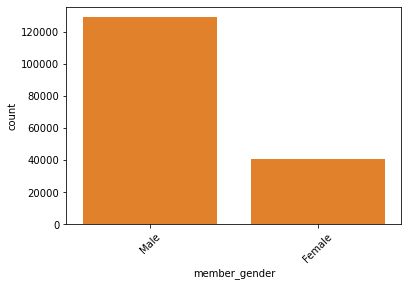

In [190]:
sb.countplot(data = df_clean, x = 'member_gender', color = sb.color_palette()[1])
plt.xticks(rotation = 45);

##### The highest numbers of rides occurred on Thursday

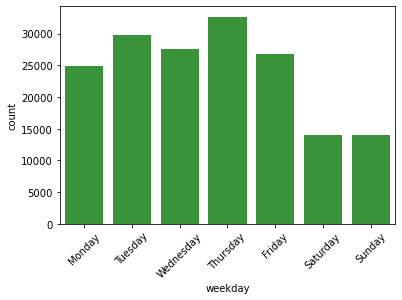

In [191]:
days = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sb.countplot(data = df_clean, x = 'weekday', color = sb.color_palette()[2], order = days)
plt.xticks(rotation = 45);

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> First we analyzed the 'duration in minutes' as it is our main variable of interest. It was heavily right-skewed. We had to transform the data using a log scale which helped us get a normal distribution. We also dropped trips longer than 100 minutes which made the data even cleaner.
At first glance, we can see that most trips were around 10 minutes long.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The distribution of the 'age' variable was also heavily right-skewed. When looking closely at the age data there were some unusual data points - the oldest customer was 141 years old - which for sure is a mistake. For our analysis, I decided to drop customers older than 65 years old. This in turn made our distribution nicer - still right-skewed but in reason.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [192]:
df_clean.describe()

,duration_sec,bike_id,member_birth_year,hour,duration_minutes,age
count,169513.000000,169513.000000,169513.000000,169513.000000,169513.000000,169513.000000
mean,632.194392,4481.961047,1985.156489,13.457404,10.536478,33.843511
std,504.899629,1657.785239,9.460529,4.738949,8.418791,9.460529
min,61.000000,11.000000,1954.000000,0.000000,1.000000,18.000000
25%,322.000000,3802.000000,1980.000000,9.000000,5.000000,27.000000
50%,508.000000,4959.000000,1987.000000,14.000000,8.000000,32.000000
75%,782.000000,5504.000000,1992.000000,17.000000,13.000000,39.000000
max,6020.000000,6645.000000,2001.000000,23.000000,100.000000,65.000000


##### We can see a negative relationship between age and the duration of the ride - which is understandable - however, this does not mean that older people only ride for a short time there are many cases where over 65 rode for over 80 minutes. 

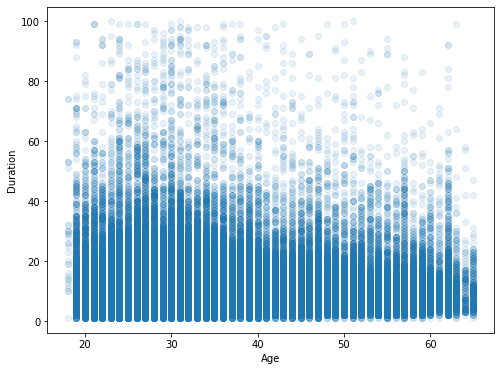

In [193]:
plt.figure(figsize = [8, 6])
plt.scatter(data = df_clean, x = 'age', y = 'duration_minutes', alpha = 1/10);
plt.xlabel('Age');
plt.ylabel('Duration');

##### From the graph below we can see that customers overall ride for a longer time - we will take a closer look later at this relationship.

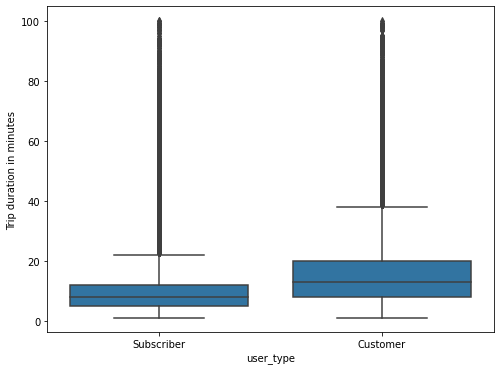

In [194]:
plt.figure(figsize = [8, 6])
sb.boxplot(data=df_clean, x='user_type', y='duration_minutes', color=sb.color_palette()[0]);
plt.xlabel('user_type');
plt.ylabel('Trip duration in minutes');

##### We can also see that Female users are going for longer rides on average

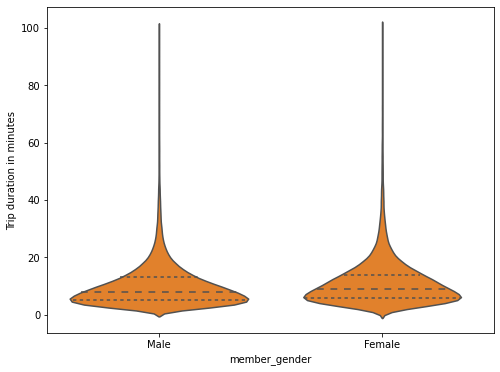

In [195]:
plt.figure(figsize = [8, 6])
sb.violinplot(data=df_clean, x='member_gender', y='duration_minutes', color=sb.color_palette()[1], inner='quartile');
plt.xlabel('member_gender');
plt.ylabel('Trip duration in minutes');

##### The hour at which the bikes are rented is also interesting. We can see that people mostly use the bikes around 8 AM and 5 PM. Which indicates that they are used for commuting.

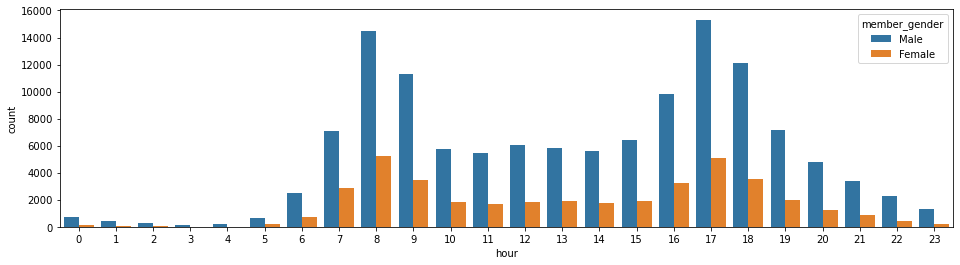

In [196]:
fig = plt.figure(figsize = [16,4])
sb.countplot(data = df_clean, x = 'hour', hue = 'member_gender');

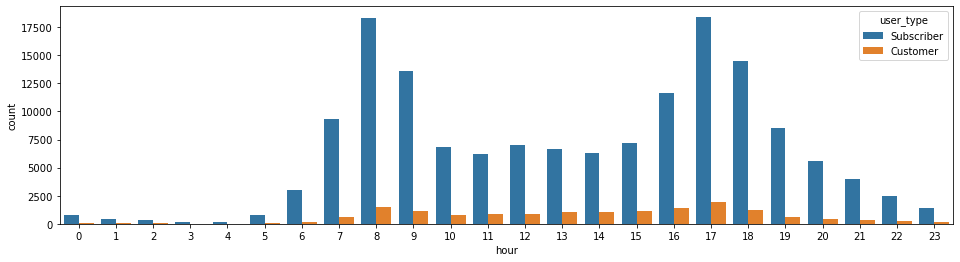

In [197]:
fig = plt.figure(figsize = [16,4])
sb.countplot(data = df_clean, x = 'hour', hue = 'user_type');

##### As we can see in the graph below bike renting patterns differ a lot based on whether it's the weekend or a weekday. On weekdays the bikes are used mostly during rush hours. On the weekend, on the other hand, usage is more spread out with a peak during the midday. 

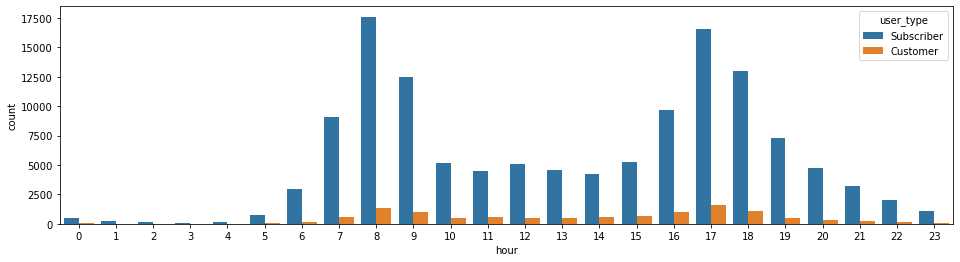

In [198]:
fig = plt.figure(figsize = [16,4])
sb.countplot(data = df_clean.query('weekday == ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]'), x = 'hour', hue = 'user_type');

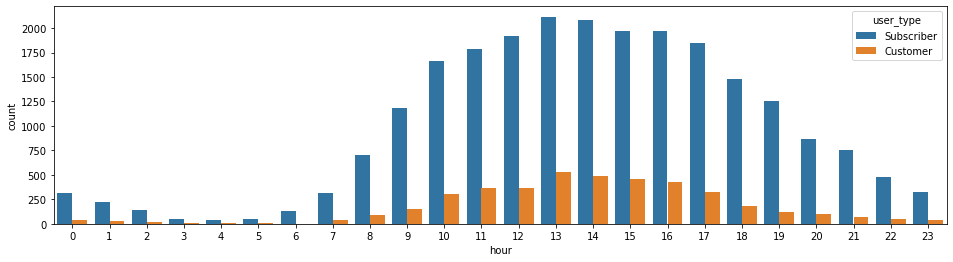

In [199]:
fig = plt.figure(figsize = [16,4])
sb.countplot(data = df_clean.query('weekday == ["Saturday", "Sunday"]'), x = 'hour', hue = 'user_type');

In [200]:
days = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
days_dtype = pd.api.types.CategoricalDtype(categories=days, ordered=True)
df_clean['weekday'] = df_clean['weekday'].astype(days_dtype)

##### Below I wanted to look at the relationship between user type and the day on which the bike is rented. Unfortunately due to the much higher number of subscribers vs customers, it's hard to make any conclusions. Let's try to transform the data.

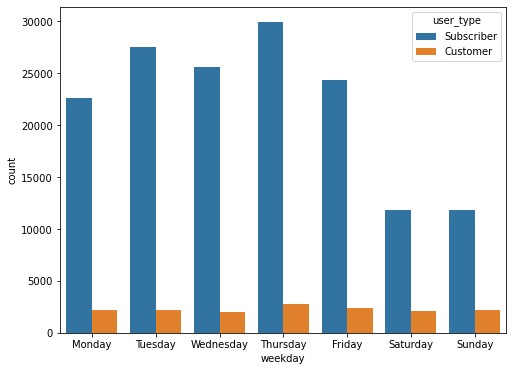

In [201]:
plt.figure(figsize = [8, 6])
sb.countplot(data=df_clean, x='weekday', hue='user_type');
plt.xlabel('weekday');
plt.ylabel('count');

In [202]:
df_clean.user_type.value_counts()

Subscriber    153739
Customer       15774
Name: user_type, dtype: int64

##### I will create a new data frame where I will calculate a ratio for subscribers and customer's which will help us analyze the data better.

In [203]:

df_ratio = df_clean.groupby(['weekday', 'user_type'])['duration_sec'].count()
df_ratio = df_ratio.reset_index()

In [204]:
df_ratio.rename(columns={'duration_sec': 'quantity'}, inplace=True)

In [205]:
df_ratio

,weekday,user_type,quantity
0,Monday,Customer,2216
1,Monday,Subscriber,22619
2,Tuesday,Customer,2197
3,Tuesday,Subscriber,27563
4,Wednesday,Customer,1997
5,Wednesday,Subscriber,25590
6,Thursday,Customer,2729
7,Thursday,Subscriber,29934
8,Friday,Customer,2418
9,Friday,Subscriber,24374


In [206]:
df_ratio_cust = df_ratio.query('user_type == "Customer"')
df_ratio_cust

,weekday,user_type,quantity
0,Monday,Customer,2216
2,Tuesday,Customer,2197
4,Wednesday,Customer,1997
6,Thursday,Customer,2729
8,Friday,Customer,2418
10,Saturday,Customer,2067
12,Sunday,Customer,2150


In [207]:
df_ratio_sub = df_ratio.query('user_type == "Subscriber"')
df_ratio_sub

,weekday,user_type,quantity
1,Monday,Subscriber,22619
3,Tuesday,Subscriber,27563
5,Wednesday,Subscriber,25590
7,Thursday,Subscriber,29934
9,Friday,Subscriber,24374
11,Saturday,Subscriber,11864
13,Sunday,Subscriber,11795


In [208]:
df_ratio_cust = df_ratio_cust.assign(ratio=df_ratio_cust.quantity.transform(lambda x: x / x.sum()))

In [209]:
df_ratio_sub = df_ratio_sub.assign(ratio=df_ratio_sub.quantity.transform(lambda x: x / x.sum()))

In [210]:
df_ratio_sub

,weekday,user_type,quantity,ratio
1,Monday,Subscriber,22619,0.147126
3,Tuesday,Subscriber,27563,0.179284
5,Wednesday,Subscriber,25590,0.166451
7,Thursday,Subscriber,29934,0.194707
9,Friday,Subscriber,24374,0.158541
11,Saturday,Subscriber,11864,0.077170
13,Sunday,Subscriber,11795,0.076721


In [211]:
ratios = df_ratio_cust.append(df_ratio_sub)

In [212]:
ratios

,weekday,user_type,quantity,ratio
0,Monday,Customer,2216,0.140484
2,Tuesday,Customer,2197,0.139280
4,Wednesday,Customer,1997,0.126601
6,Thursday,Customer,2729,0.173006
8,Friday,Customer,2418,0.153290
10,Saturday,Customer,2067,0.131038
12,Sunday,Customer,2150,0.136300
1,Monday,Subscriber,22619,0.147126
3,Tuesday,Subscriber,27563,0.179284
5,Wednesday,Subscriber,25590,0.166451


In [213]:
ratios.to_csv(r'ratios.csv', index = False, header=True)

##### After transforming the data we can see an interesting observation. During the working week proportionally subscribers used the service more, however, on the weekend regular customer used it proportionally more often. This means that on the weekend many casual bike riders use the service and people that use it during the week for commuting don't use the service as often.

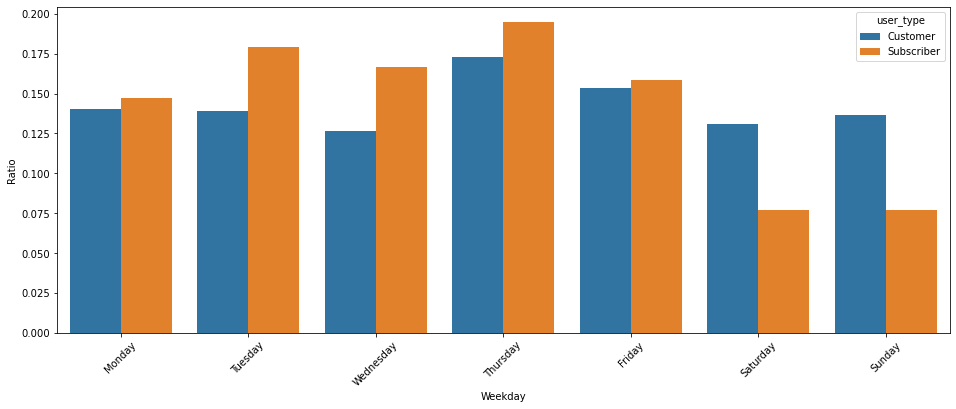

In [214]:
plt.figure(figsize=(16,6))
sb.barplot(x='weekday', y='ratio', hue='user_type', data=ratios);
plt.xlabel('Weekday');
plt.ylabel('Ratio');
plt.xticks(rotation = 45);

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> From my visual analysis I can conclude that:

>- With age people take shorter rides
>- Customer rent the bikes for a longer time vs subscribers
>- People use mostly bikes for commuting (around 8 AM and 5 PM)

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> A very interesting observation is that on weekdays on average subscribers use the bikes more - probably for commuting. However, on the weekend random customers on average use the service more - probably leisurely bike riders :)

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [215]:
df_clean.head(1)

,duration_sec,start_time,end_time,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,weekday,hour,duration_minutes,age
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,4898,Subscriber,1974.0,Male,Yes,Thursday,23,26,45


In [216]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169513 entries, 4 to 183411
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             169513 non-null  int64         
 1   start_time               169513 non-null  datetime64[ns]
 2   end_time                 169513 non-null  datetime64[ns]
 3   bike_id                  169513 non-null  int64         
 4   user_type                169513 non-null  object        
 5   member_birth_year        169513 non-null  float64       
 6   member_gender            169513 non-null  object        
 7   bike_share_for_all_trip  169513 non-null  object        
 8   weekday                  169513 non-null  category      
 9   hour                     169513 non-null  int64         
 10  duration_minutes         169513 non-null  int32         
 11  age                      169513 non-null  int32         
dtypes: category(1), 

##### When analyzing the graph below we can see no clear differences in bike usage depending on user type and gender. The relationship is similar - customers be it male or female on average rent the bike for longer periods

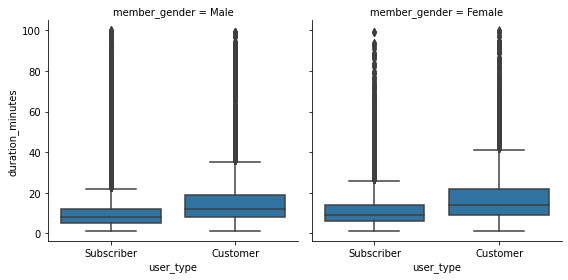

In [217]:
g = sb.FacetGrid(data = df_clean, col = 'member_gender', size = 4)
g.map(sb.boxplot, 'user_type', 'duration_minutes')

##### Below we can see an interesting observation. We can verify that female bike riders tend to rent the bike for longer. Also, we can verify that the youngest people rent the bike for the longer periods of time. However, one interesting thing to note is that people that are older than 50 years tend to rent the bike for longer compared to 30 - 50 year olds. We did not see this when analyzing the graph comparing age and rental duration.

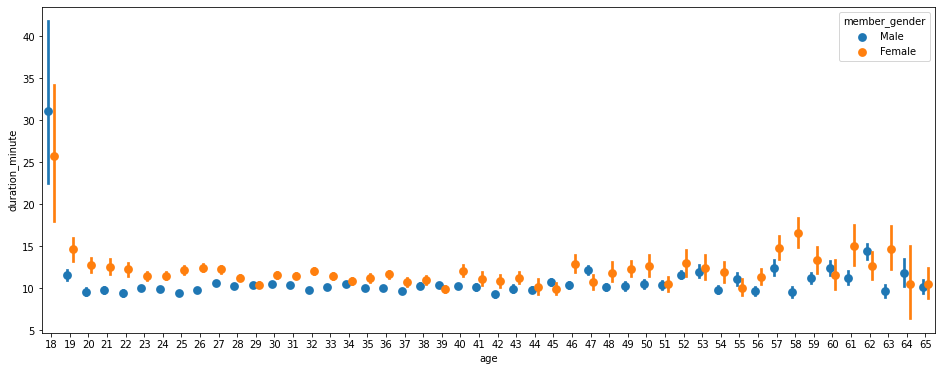

In [218]:
fig = plt.figure(figsize = [16,6])
sb.pointplot(data=df_clean, x='age', y='duration_minutes', hue='member_gender', dodge=0.3, linestyles="");
plt.xlabel('age');
plt.ylabel('duration_minute');

##### The graph below also confirms our previous findings. Customers on average rent the bike for longer periods. The youngest people rent also for the longest duration. However here we can also see the confirmation that bike riders over 50 years old start to ride for longer periods.

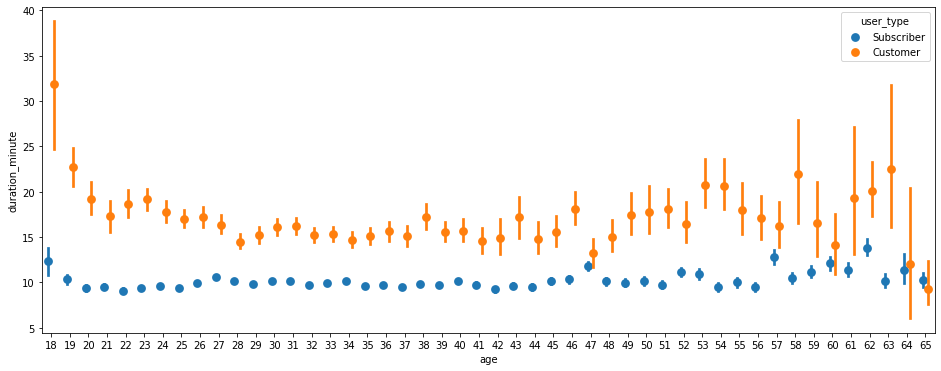

In [219]:
fig = plt.figure(figsize = [16,6])
sb.pointplot(data=df_clean, x='age', y='duration_minutes', hue='user_type', dodge=0.3, linestyles="");
plt.xlabel('age');
plt.ylabel('duration_minute');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Most of our previous findings were strengthened in the Multivariate exploration.

>- Female riders rent bikes for longer periods
>- The youngest people rent a bike for the longest
>- Customer rent bikes for a longer duration vs subscribers

### Were there any interesting or surprising interactions between features?

> The most surprising feature was the age analysis. As previously stated I confirmed that 'The youngest people rent a bike for the longest'. However, what we did not see on our scatter plot is that after the age of 50 people start going for longer rides which is very interesting. It may be connected with a fact that the bike stops being a tool for commuting and starts being a tool for exercising. Mostly we can see this trend when looking at customers. Which as we previously assumed use bikes mostly on weekends for leisure. 

> All in all this was a very interesting analysis

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

In [220]:
df_clean.to_csv(r'df_clean.csv', index = False, header=True)